In [18]:
import numpy as np
import matplotlib.pyplot as plt

#載入iris資料集
from sklearn.datasets import load_iris 

iris = load_iris()
iris.feature_names #特徵名稱


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.target_names #種類

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
X = iris.data #資料
Y = iris.target #label

In [60]:
len(X)

150

In [53]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [61]:
Y #iris.target_names #蘭花種類，共3種

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
X = X[:,2:] #根據前人經驗，用這兩個參數 分類藍花 ,X 剩下兩個維度

In [67]:
X[:,0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

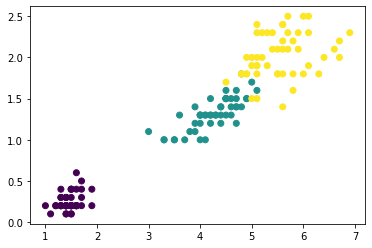

In [68]:
plt.scatter(X[:,0], X[:,1], c=Y)

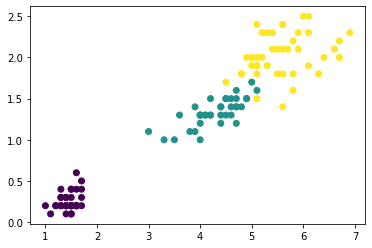

In [95]:
#產生訓練集跟測試集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=1000)
#x 輸入 y輸出
#使用test 測試模型
#一開始就抽出部分資料做 test,test_size=0.2  20%
#random_state 選擇一個任意亂數 ,指定 是為了跟老師相同且剛好100%辨識率,不同random_state 會造成辨識率不同
#random seed

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [92]:
print(len(y_train),len(y_test))

120 30


In [89]:
38/150 #(總共150筆資料,其中30筆座test用)

0.25333333333333335

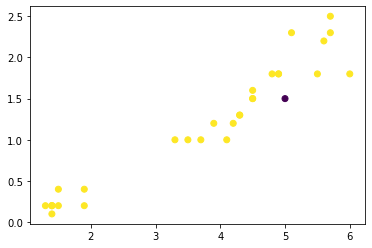

In [96]:
#使用SVM來做分類
#1. 載入模型
from sklearn.svm import SVC
#2. 建立模型
clf = SVC()
#3. 訓練模型
clf.fit(x_train, y_train)
#4. 使用模型來做預測
y_predict = clf.predict(x_test)

plt.scatter(x_test[:,0], x_test[:,1], c=y_predict-y_test) #c=y_predict-y_test 相減非零 就會標色

In [97]:
y_predict-y_test #實務上，依照能接受的程度 回去調整random_state
#可以參考68-95-99.7 rule 

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

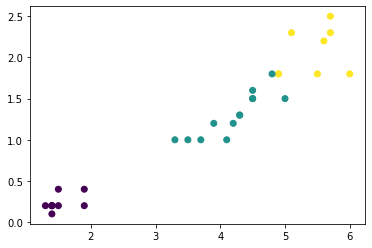

In [98]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict)